In [1]:
import os, sys
import zipfile
import random
import numpy as np
import tensorflow as tf
import nibabel as nib

from tensorflow import keras
from tensorflow.keras import layers

from scipy import ndimage
from tqdm import tqdm

from sklearn.model_selection import train_test_split

2022-04-19 20:31:37.430181: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /software/spackages/linux-centos8-x86_64/gcc-8.3.1/anaconda3-2021.05-5tjen3mrle3pnguoedh4n2stzzsmywn7/lib
2022-04-19 20:31:37.430206: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:

Input_img = keras.Input(shape=(128, 128, 64,1))
                        
x1 = layers.Conv3D(256, (3, 3, 3), activation='relu', padding='same')(Input_img)
x2 = layers.Conv3D(128, (3, 3, 3), activation='relu', padding='same')(x1)
x2 = layers.MaxPool3D( (2, 2, 2))(x2)
encoded = layers.Conv3D(64, (3, 3, 3), activation='relu', padding='same')(x2)

# decoding architecture
x3 = layers.Conv3D(64, (3, 3, 3), activation='relu', padding='same')(encoded)
x3 = layers.UpSampling3D((2, 2, 2))(x3)
x2 = layers.Conv3D(128, (3, 3, 3), activation='relu', padding='same')(x3)
x1 = layers.Conv3D(256, (3, 3, 3), activation='relu', padding='same')(x2)
decoded = layers.Conv3D(3, (3, 3, 3), padding='same')(x1)

autoencoder = keras.Model(Input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 64, 1)  0         
                             ]                                   
                                                                 
 conv3d (Conv3D)             (None, 128, 128, 64, 256  7168      
                             )                                   
                                                                 
 conv3d_1 (Conv3D)           (None, 128, 128, 64, 128  884864    
                             )                                   
                                                                 
 max_pooling3d (MaxPooling3D  (None, 64, 64, 32, 128)  0         
 )                                                               
                                                                 
 conv3d_2 (Conv3D)           (None, 64, 64, 32, 64)    221248

2022-04-19 20:31:49.854855: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /software/spackages/linux-centos8-x86_64/gcc-8.3.1/anaconda3-2021.05-5tjen3mrle3pnguoedh4n2stzzsmywn7/lib
2022-04-19 20:31:49.855311: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /software/spackages/linux-centos8-x86_64/gcc-8.3.1/anaconda3-2021.05-5tjen3mrle3pnguoedh4n2stzzsmywn7/lib
2022-04-19 20:31:49.855582: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /software/spackages/linux-centos8-x86_64/gcc-8.3

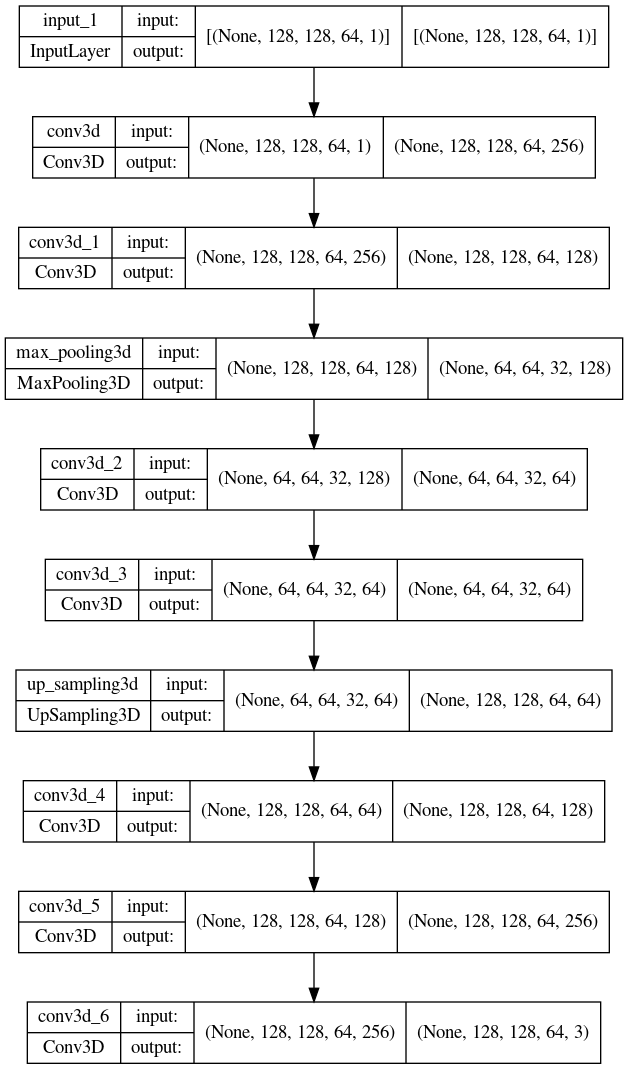

In [3]:
tf.keras.utils.plot_model(autoencoder, to_file='autoencoder.png', show_shapes=True, rankdir='TB')

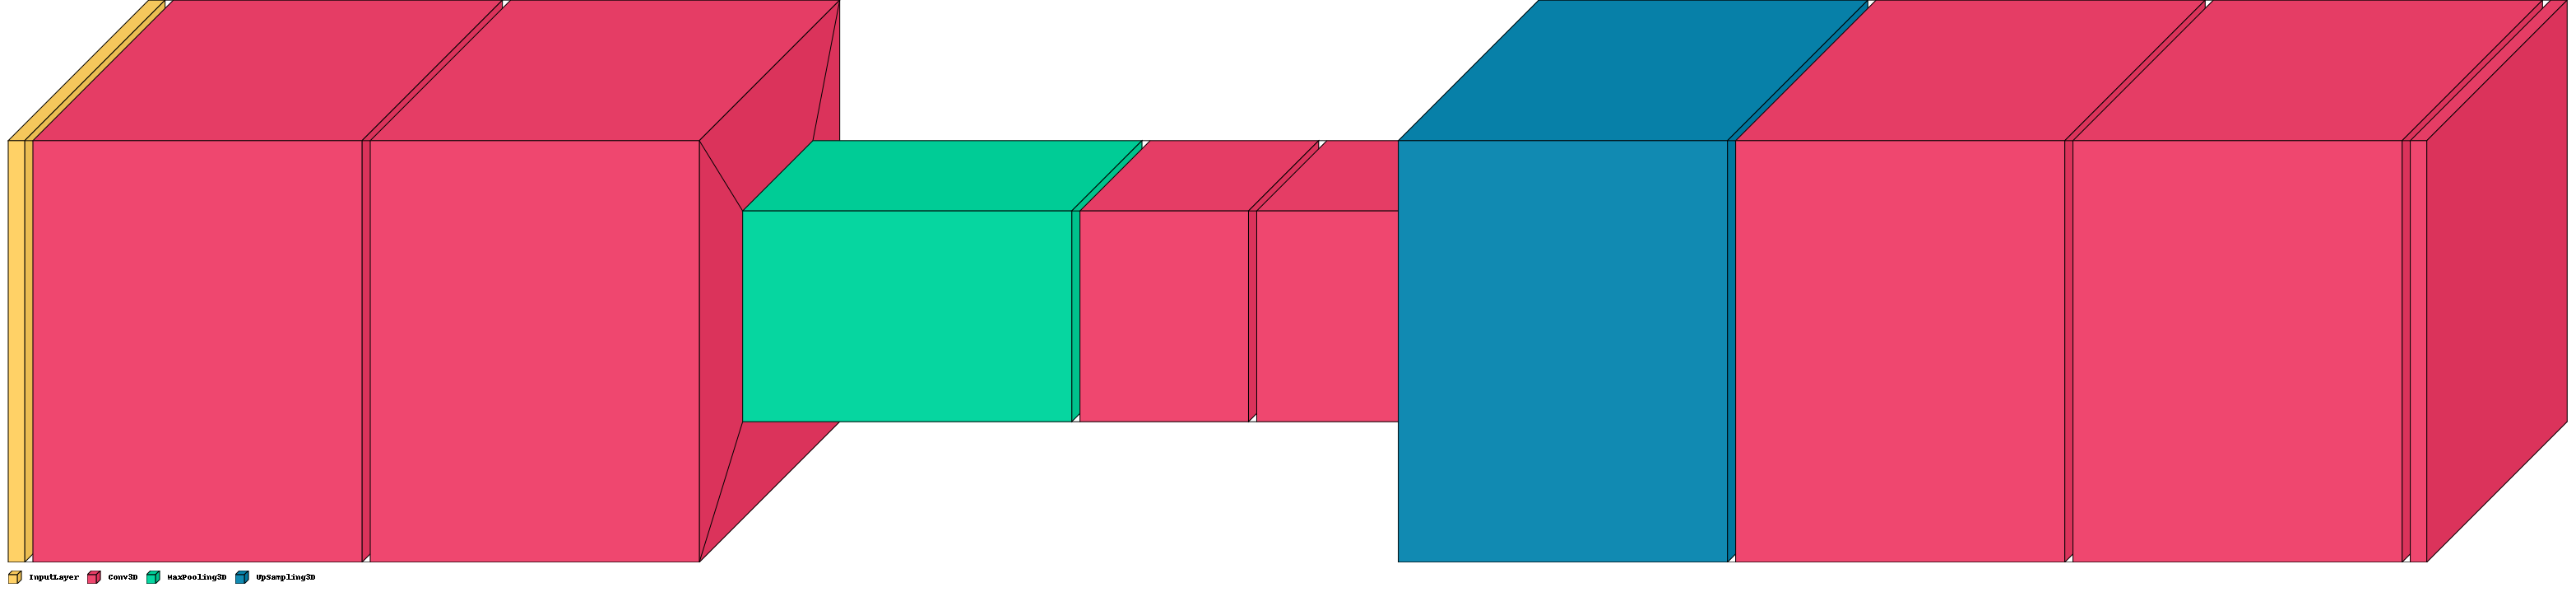

In [4]:
import visualkeras
visualkeras.layered_view(autoencoder, to_file='autoencoder_model_v2.png', legend=True)